In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.arange(-5, 5, 0.5)
x

tensor([-5.0000, -4.5000, -4.0000, -3.5000, -3.0000, -2.5000, -2.0000, -1.5000,
        -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,  2.0000,  2.5000,
         3.0000,  3.5000,  4.0000,  4.5000])

In [8]:
def f(xx): return 2*xx**2 + xx + torch.randn(x.size())

In [9]:
y = f(x)
y

tensor([ 4.5411e+01,  3.5681e+01,  2.7963e+01,  2.0722e+01,  1.4579e+01,
         9.3569e+00,  5.9130e+00,  1.7206e+00,  1.9036e+00, -1.8651e+00,
         2.6340e-02,  4.0416e-01,  4.1578e+00,  6.7220e+00,  1.0002e+01,
         1.4270e+01,  2.1435e+01,  2.7773e+01,  3.4913e+01,  4.6699e+01])

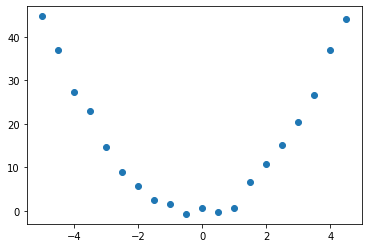

In [10]:
plt.scatter(x, f(x))

In [2]:
params = torch.tensor([-1., -1.])
params.requires_grad_()
params

tensor([-1., -1.], requires_grad=True)

In [4]:
help(torch.clone)

Help on built-in function clone:

clone(...)
    clone(input, *, memory_format=torch.preserve_format) -> Tensor
    
    Returns a copy of :attr:`input`.
    
    .. note::
    
        This function is differentiable, so gradients will flow back from the
        result of this operation to :attr:`input`. To create a tensor without an
        autograd relationship to :attr:`input` see :meth:`~Tensor.detach`.
    
    Args:
        input (Tensor): the input tensor.
    
    Keyword args:
        memory_format (:class:`torch.memory_format`, optional): the desired memory format of
            returned tensor. Default: ``torch.preserve_format``.



In [42]:
orig = params.clone()

In [43]:
def g(params): return params[0]*x**2 + params[1]*x

In [44]:
g(params)

tensor([-20.0000, -15.7500, -12.0000,  -8.7500,  -6.0000,  -3.7500,  -2.0000,
         -0.7500,   0.0000,   0.2500,  -0.0000,  -0.7500,  -2.0000,  -3.7500,
         -6.0000,  -8.7500, -12.0000, -15.7500, -20.0000, -24.7500],
       grad_fn=<AddBackward0>)

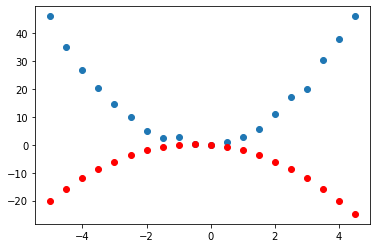

In [45]:
plt.scatter(x, f(x))
plt.scatter(x, g(params).detach().cpu().numpy(), color='red')

In [46]:
def mse(params):
    pred = g(params)
    y = f(x)
    return ((y - pred)**2).mean()

In [47]:
loss = mse(params)
loss

tensor(1108.7231, grad_fn=<MeanBackward0>)

In [48]:
params.grad

In [49]:
loss.backward()

In [50]:
params.grad

tensor([-739.3873,    4.0270])

In [51]:
params

tensor([-1., -1.], requires_grad=True)

In [52]:
params.data -= 0.0005*params.grad.data
params

tensor([-0.6303, -1.0020], requires_grad=True)

In [53]:
def apply_step():
    loss = mse(params)
    loss.backward()
    print(loss.item())
    params.data -= 0.0005*params.grad.data
    params.grad = None

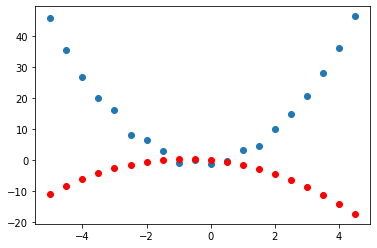

In [54]:
plt.scatter(x, f(x))
plt.scatter(x, g(params).detach().cpu().numpy(), color='red')

In [55]:
apply_step()

851.7808837890625


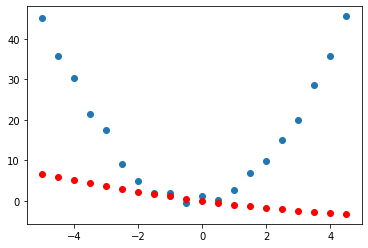

In [56]:
plt.scatter(x, f(x))
plt.scatter(x, g(params).detach().cpu().numpy(), color='red')

25.3494873046875


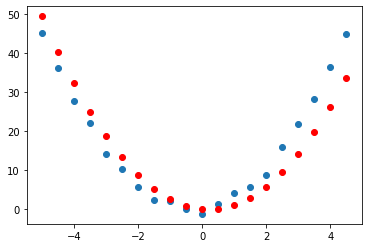

In [78]:
apply_step()
plt.scatter(x, f(x))
plt.scatter(x, g(params).detach().cpu().numpy(), color='red')

In [82]:
params = torch.tensor([-1.,-1.]).requires_grad_()
for i in range(70):
    apply_step()

1099.815185546875
849.6153564453125
658.9589233398438
508.9513244628906
386.55352783203125
327.00225830078125
234.11947631835938
201.11790466308594
151.47372436523438
121.72682189941406
93.21891784667969
83.41034698486328
68.40473937988281
62.363624572753906
52.321754455566406
46.218238830566406
44.121910095214844
38.42809295654297
38.17226028442383
35.26327896118164
30.013742446899414
29.52887535095215
32.27452850341797
29.589792251586914
29.29555892944336
26.73809814453125
22.949405670166016
23.547727584838867
28.672128677368164
25.492938995361328
25.17172622680664
23.391645431518555
23.208065032958984
22.382190704345703
18.711669921875
21.68460464477539
22.953283309936523
18.34304428100586
22.3007755279541
20.74721908569336
22.77849769592285
15.875622749328613
19.999774932861328
18.42196273803711
21.554920196533203
22.332223892211914
19.294374465942383
19.75754737854004
19.298009872436523
20.682071685791016
15.075543403625488
17.810657501220703
15.485188484191895
17.429025650024414


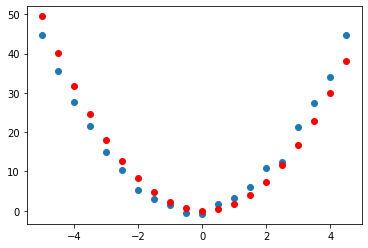

In [83]:
plt.scatter(x, f(x))
plt.scatter(x, g(params).detach().cpu().numpy(), color='red')